<a href="https://colab.research.google.com/github/desertigorr/computer-vision-lab-1/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%A2%D0%B5%D1%85%D0%BD%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%B7%D1%80%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%961_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Работу выполняли

Марченков Яков Дмитриевич, Тех.зр R22 бак 1.1, 368497

Зиманов Игорь Андреевич, Тех.зр R22 бак 1.1, 368205

Болгов Кирилл Андреевич, Тех.зр R22 бак 1.1, 367903


##Лабораторная работа №1

ГИСТОГРАММЫ, ПРОФИЛИ И ПРОЕКЦИИ

**Цель работы**

Освоение основных яркостных и геометрических характеристик
изображений и их использование для анализа изображений.



##Гистограммы

Выбрать произвольное слабоконтрастное изображение.
Выполнить выравнивание гистограммы и растяжение контраста,
использовать рассмотренные преобразования
и встроенные функции пакета MATLAB. Сравнить полученные результаты.

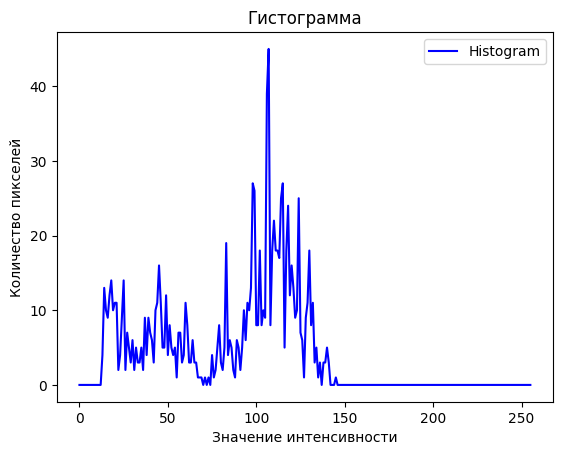

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('pic.jpg', cv2.IMREAD_GRAYSCALE)
histSize = 256
histRange = (0, 256)
imageHist = cv2.calcHist(image, [0], None, [histSize], histRange)
CH = np.cumsum(imageHist).astype(np.float32)
CH = CH / CH[-1]  # Делим на последний элемент, чтобы нормализовать к 1
I_min, I_max = np.min(image), np.max(image)

plt.figure()
plt.title("Гистограмма")
plt.xlabel("Значение интенсивности")
plt.ylabel("Количество пикселей")
plt.plot(imageHist, color="blue", label="Histogram")
plt.legend()
plt.show()

##Гистограмма изображения показывает распределение интенсивностей пикселей.

Если распределение узкое или смещено, изображение может быть низкоконтрастным или содержать мало видимых деталей.

Методы преобразования гистограмм применяются, чтобы:

- Улучшить визуальное восприятие: повысить контрастность, сделать тёмные и светлые детали различимыми.
- Нормализовать распределение яркости: устранить участки с переэкспонированием или недостатком освещённости.
- Подготовить изображение для компьютерного зрения: повысить информативность данных для дальнейшей обработки.

##Описание использованных методов
- Растяжение контраста

Расширяет динамический диапазон изображения, растягивая минимальные и максимальные значения яркости на весь диапазон [0, 255]. Его можно использовать, если изображение имеет узкий диапазон интенсивностей и кажется размытым по контрасту.

- Выравнивание гистограммы (cv2.equalizeHist)

Преобразует гистограмму так, чтобы интенсивности пикселей были распределены равномерно.Оно используется для автоматической балансировки контраста, например, в изображениях с разными уровнями освещённости.

- Сдвиг (на n значений яркости)

Оно просто добавляет 100 к каждому пикселю для увеличения общей яркости без изменения контраста.

- Равномерное преобразование

Оно перераспределяет пиксели так, чтобы их интенсивности были равномерно распределены в диапазоне [0, 255].

- Экспоненциальное преобразование

Оно усиливает различия в тёмных областях, ослабляя их в светлых.
Ипсользуется, если важно выделить детали в тёмных участках, например, в рентгеновских снимках.

- Преобразование Рэлея

Оно увеличивает контрастность по закону Рэлея, усиливая детали в средних и высоких значениях яркости. Используется в основном для улучшения изображений с преобладанием тёмных областей.

- Преобразование степени (2/3)

По сути, оно корректирует изображение при помощи возведения кумулятивной гистограммы в степень 2/3, увеличивая яркость средних тонов.

- Гиперболическое преобразование

Оно увеличивает контраст в тёмных участках и немного снижает его в светлых.
Применяется для тонкой настройки яркости при обработке научных и медицинских изображений.


In [ ]:
# метод 1: растяжение контраста
# np.cumsum(imageHist).astype(np.float32)
I_min, I_max = np.min(image), np.max(image)
contrast_stretched = (((image - I_min) / (I_max - I_min) * 255)**1.1).astype(np.uint8)
contrastHist = cv2.calcHist(contrast_stretched, [0], None, [histSize], histRange)
contrastCumHist = np.cumsum(cv2.calcHist(contrast_stretched, [0], None, [histSize], histRange)).astype(np.float32)

# метод 2: выравнивание гистограммы
equalized = cv2.equalizeHist(image)
equalizedHist = cv2.calcHist(equalized, [0], None, [histSize], histRange)
equalizedCumHist = np.cumsum(cv2.calcHist(equalized, [0], None, [histSize], histRange)).astype(np.float32)

# метод 3: сдвиг на 100 значений
shifted = image.astype(np.float32) + 100
shifted = np.clip(shifted, 0, 255).astype(np.uint8)
shiftedHist = cv2.calcHist(shifted, [0], None, [histSize], histRange)
shiftedCumHist = np.cumsum(cv2.calcHist(shifted, [0], None, [histSize], histRange)).astype(np.float32)

# метод 4: равномерное преобразование
equalized_by_transformation = (I_max - I_min) * CH[image] + I_min
equalized_by_transformation = np.round(equalized_by_transformation).astype(np.uint8)
transformedHist = cv2.calcHist(equalized_by_transformation, [0], None, [histSize], histRange)
transformedCumHist = np.cumsum(cv2.calcHist(equalized_by_transformation, [0], None, [histSize], histRange)).astype(np.float32)

# метод 5: экспоненциальное преобразование
alfa = 0.02
EPSILON = 1e-8
equalized_by_exponent = I_min - (1/alfa) * np.log(1 - CH[image] + EPSILON)
equalized_by_exponent = np.round(equalized_by_exponent).astype(np.uint8)
exponentHist = cv2.calcHist(equalized_by_exponent, [0], None, [histSize], histRange)
exponentCumHist = np.cumsum(cv2.calcHist(equalized_by_exponent, [0], None, [histSize], histRange)).astype(np.float32)

# метод 6: преобразование Рэлея
alfa = 55
EPSILON = 1e-8
equalized_by_relay = I_min + (2 * alfa**2 * np.log((1 / (1 - CH[image])) + EPSILON))**0.5
equalized_by_relay = np.round(equalized_by_relay).astype(np.uint8)
relayHist = cv2.calcHist(equalized_by_relay, [0], None, [histSize], histRange)
relayCumHist = np.cumsum(cv2.calcHist(equalized_by_relay, [0], None, [histSize], histRange)).astype(np.float32)

# метод 7: преобразование степени 2/3
equalized_by_power23 = CH[image]**(2/3)
equalized_by_power23 = np.round(equalized_by_power23*255/np.max(equalized_by_power23)).astype(np.uint8)
power23Hist = cv2.calcHist(equalized_by_power23, [0], None, [histSize], histRange)
power23CumHist = np.cumsum(cv2.calcHist(equalized_by_power23, [0], None, [histSize], histRange)).astype(np.float32)

# метод 8: гиперболическое преобразование
alfa = 198
equalized_by_hyperboloid = alfa**CH[image]
equalized_by_hyperboloid = np.round(equalized_by_hyperboloid).astype(np.uint8)
hyperboloidHist = cv2.calcHist(equalized_by_hyperboloid, [0], None, [histSize], histRange)
hyperboloidCumHist = np.cumsum(cv2.calcHist(equalized_by_hyperboloid, [0], None, [histSize], histRange)).astype(np.float32)

<ipython-input-72-01637fc1a016>:36: RuntimeWarning: divide by zero encountered in divide
  equalized_by_relay = I_min + (2 * alfa**2 * np.log((1 / (1 - CH[image])) + EPSILON))**0.5
<ipython-input-72-01637fc1a016>:37: RuntimeWarning: invalid value encountered in cast
  equalized_by_relay = np.round(equalized_by_relay).astype(np.uint8)


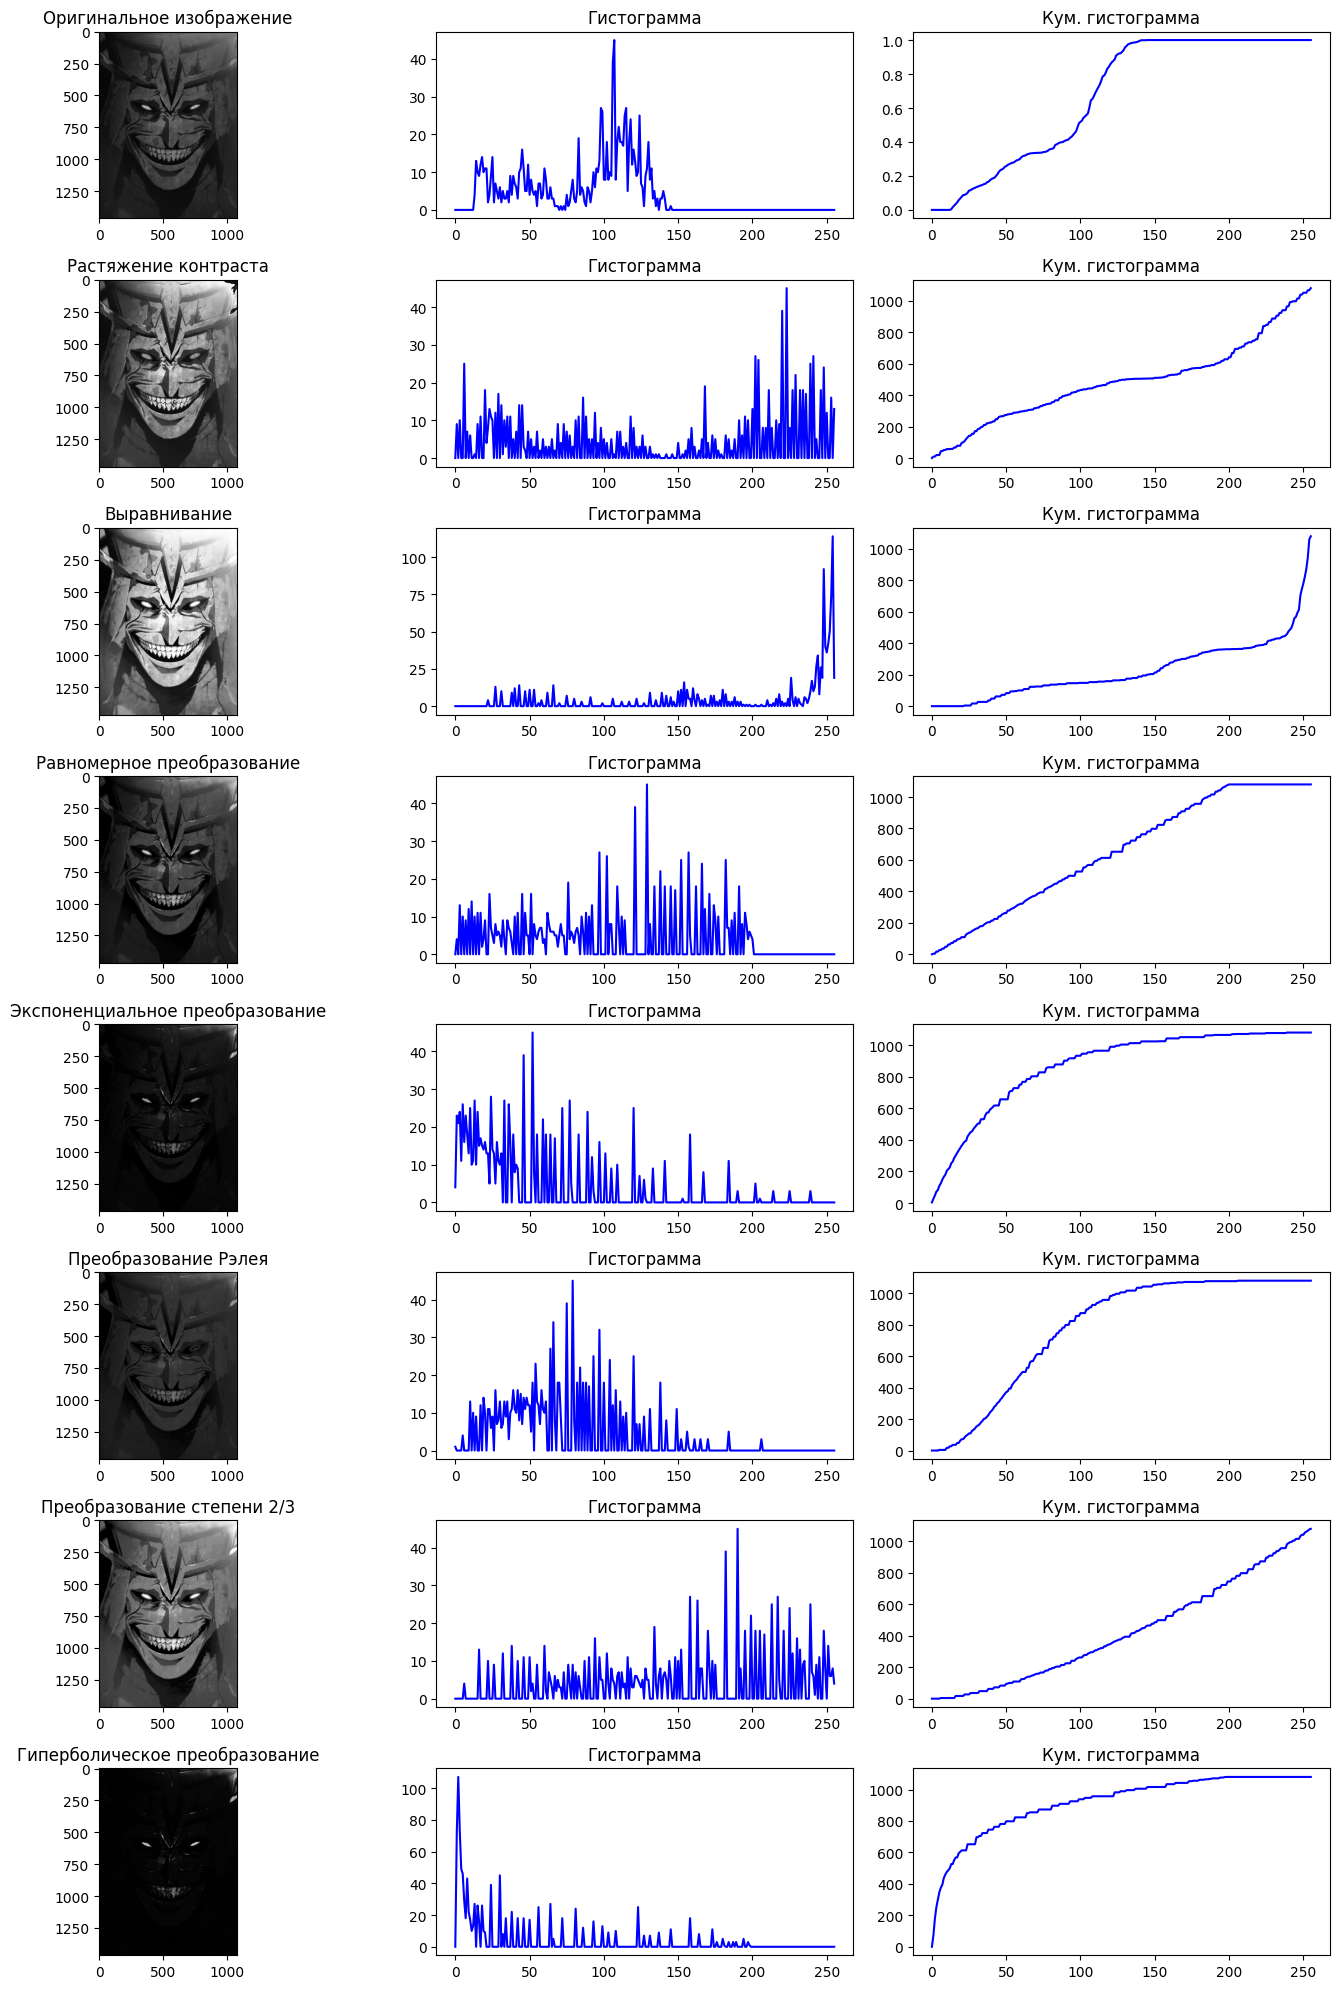

In [ ]:
# Отображение результатов
fig, axes = plt.subplots(8, 3, figsize=(14, 20))  # 3 строки, 2 столбца

# Исходное изображение
axes[0, 0].imshow(image, cmap='gray', vmin=0, vmax=255)
axes[0, 0].set_title("Оригинальное изображение")
axes[0, 1].plot(imageHist, color="blue", label="Histogram")
axes[0, 1].set_title("Гистограмма")
axes[0, 2].plot(CH, color="blue", label="Histogram")
axes[0, 2].set_title("Кум. гистограмма")

# Растяжение контраста
axes[1, 0].imshow(contrast_stretched, cmap='gray', vmin=0, vmax=255)
axes[1, 0].set_title("Растяжение контраста")
axes[1, 1].plot(contrastHist, color="blue", label="Histogram")
axes[1, 1].set_title("Гистограмма")
axes[1, 2].plot(contrastCumHist, color="blue", label="Histogram")
axes[1, 2].set_title("Кум. гистограмма")


# Выравнивание
axes[2, 0].imshow(equalized, cmap='gray', vmin=0, vmax=255)
axes[2, 0].set_title("Выравнивание")
axes[2, 1].plot(equalizedHist, color="blue", label="Histogram")
axes[2, 1].set_title("Гистограмма")
axes[2, 2].plot(equalizedCumHist, color="blue", label="Histogram")
axes[2, 2].set_title("Кум. гистограмма")

# Равномерное преобразование
axes[3, 0].imshow(equalized_by_transformation, cmap='gray', vmin=0, vmax=255)
axes[3, 0].set_title("Равномерное преобразование")
axes[3, 1].plot(transformedHist, color="blue", label="Histogram")
axes[3, 1].set_title("Гистограмма")
axes[3, 2].plot(transformedCumHist, color="blue", label="Histogram")
axes[3, 2].set_title("Кум. гистограмма")

# Экспоненциальное преобразование
axes[4, 0].imshow(equalized_by_exponent, cmap='gray', vmin=0, vmax=255)
axes[4, 0].set_title("Экспоненциальное преобразование")
axes[4, 1].plot(exponentHist, color="blue", label="Histogram")
axes[4, 1].set_title("Гистограмма")
axes[4, 2].plot(exponentCumHist, color="blue", label="Histogram")
axes[4, 2].set_title("Кум. гистограмма")

# Преобразование Рэлея
axes[5, 0].imshow(equalized_by_relay, cmap='gray', vmin=0, vmax=255)
axes[5, 0].set_title("Преобразование Рэлея")
axes[5, 1].plot(relayHist, color="blue", label="Histogram")
axes[5, 1].set_title("Гистограмма")
axes[5, 2].plot(relayCumHist, color="blue", label="Histogram")
axes[5, 2].set_title("Кум. гистограмма")

# Преобразование степени 2/3
axes[6, 0].imshow(equalized_by_power23, cmap='gray', vmin=0, vmax=255)
axes[6, 0].set_title("Преобразование степени 2/3")
axes[6, 1].plot(power23Hist, color="blue", label="Histogram")
axes[6, 1].set_title("Гистограмма")
axes[6, 2].plot(power23CumHist, color="blue", label="Histogram")
axes[6, 2].set_title("Кум. гистограмма")

# Гиперболическое преобразование
axes[7, 0].imshow(equalized_by_hyperboloid, cmap='gray', vmin=0, vmax=255)
axes[7, 0].set_title("Гиперболическое преобразование")
axes[7, 1].plot(hyperboloidHist, color="blue", label="Histogram")
axes[7, 1].set_title("Гистограмма")
axes[7, 2].plot(hyperboloidCumHist, color="blue", label="Histogram")
axes[7, 2].set_title("Кум. гистограмма")

plt.tight_layout()  # Улучшает расположение графиков
plt.show()


##Профили

Выбрать произвольное изображение, содержащие
штрих-код. Выполнить построение профиля изображения
вдоль штрих-кода.

Профиль изображения вдоль прямой – это функция
распределения интенсивности изображения вдоль
заданной прямой.

Простейший профиль изображения – это «строковый»
профиль: $$profile(I, i, x)=I(x,i)$$
где *i* – это номер строки изображения

«Столбцовый» профиль: $$profile(I, j, y)=I(j,y)$$
где *j* – это номер столбца изображения


Text(0.5, 1.0, 'Профиль')

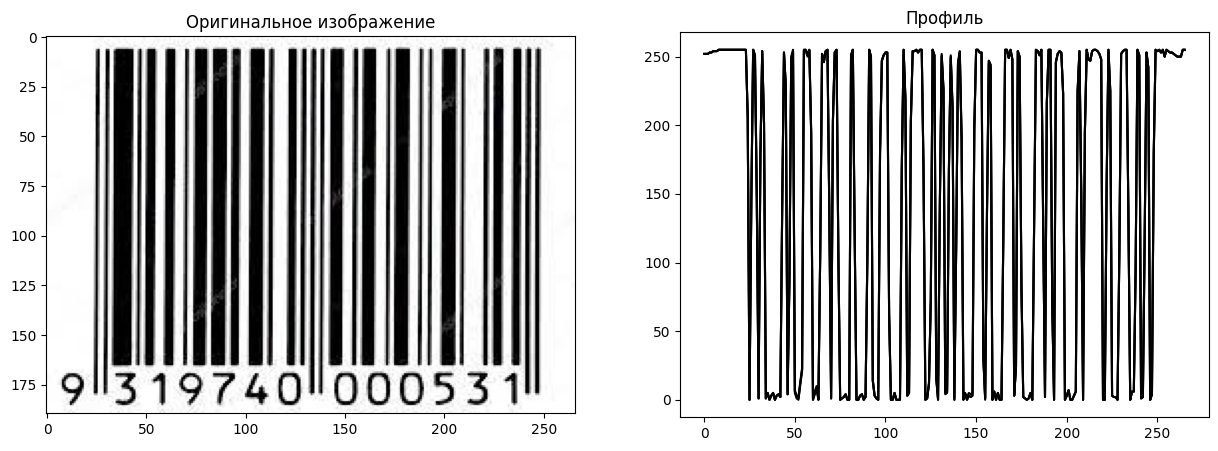

In [ ]:
I = cv2.imread('barcode.jpg', cv2.IMREAD_COLOR)

profile = I[round(I.shape[0] / 2), :]


fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].imshow(I, cmap='gray', vmin=0, vmax=255)
axes[0].set_title("Оригинальное изображение")
axes[1].plot(profile, color="black", label="Histogram")
axes[1].set_title("Профиль")



##Проекции

Выбрать произвольное изображение, содержащее
монотонные области и выделяющиеся объекты. Произвести
построение проекций изображения на вертикальную и горизонтальную оси. Определить границы областей объектов.

Проекцией изображения на некоторую ось является сумма
интенсивностей пикселей в направлении,
перпендикулярном этой оси.

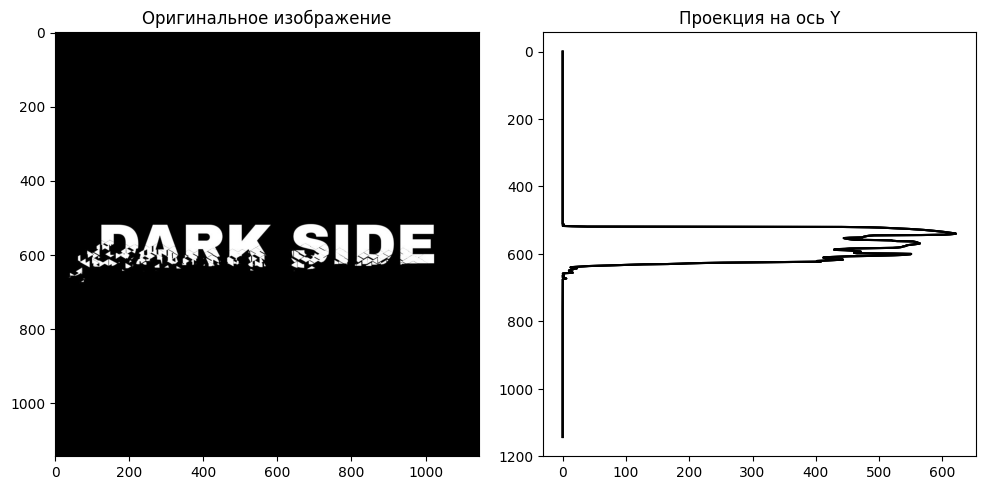

In [ ]:
I = cv2.imread('darkside.jpg', cv2.IMREAD_COLOR).astype(np.uint8)


ProjI = np.sum(I, 1) / 255

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(I, cmap='gray', vmin=0, vmax=255)
axes[0].set_title("Оригинальное изображение")
axes[1].plot(ProjI, np.arange(len(ProjI)), color="black")
axes[1].invert_yaxis()  # Инвертируем ось Y, чтобы график шёл сверху вниз
axes[1].set_title("Проекция на ось Y")

plt.tight_layout()
plt.show()


##Выводы
В ходе выполнения лабораторной работы были изучены основные яркостные и геометрические характеристики изображений, а также их применение в задачах анализа изображений. Мы освоили работу с библиотекой OpenCV и применение Python для обработки изображений. Проведя различные преобразования выбранного изображения и анализируя соответствующие гистограммы, мы глубже разобрались в механизмах этих преобразований и их влиянии на визуальные свойства изображения.

##Ответы на вопросы
- Что такое контрастность изображения и как её можно изменить?

Контрастность — это степень различия между светлыми и тёмными областями изображения. Она определяется разницей между минимальной и максимальной яркостью пикселей. Изменение контрастности возможно с помощью различных методов обработки изображений, выбор которых зависит от исходного состояния изображения и желаемого результата. В рамках данной лабораторной работы были изучены несколько таких методов, включая растяжение гистограммы, нелинейные преобразования и выравнивание контраста.

- Чем эффективно использование профилей и проекций изображения?

Профили и проекции позволяют анализировать распределение яркости в изображении, что помогает выявлять расположение и размеры объектов. Эти методы широко применяются, например, в распознавании текста, когда необходимо определить его положение на изображении перед обработкой OCR.

- Каким образом можно найти объект на равномерном фоне?

Для обнаружения объекта на однородном фоне можно использовать анализ проекций изображения на координатные оси. Если объект контрастирует с фоном, его границы отразятся на графике проекции в виде скачков или экстремумов, соответствующих расположению контура объекта. Такой подход упрощает выделение объектов и их дальнейшую обработку.

